Topic:        Challenge Set 5  
Subject:      Linear Regression and Train/Test Split challenges  
Date:         01/27/2018  
Name:         Christine Chen  

**Challenge 1**

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [119]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import numpy as np
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split

%matplotlib inline

/Users/indigo8105/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
df = pd.read_csv('../../nyc18_ds14/challenges/challenges_data/2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [29]:
df.DomesticTotalGross.describe()

count    1.000000e+02
mean     1.005969e+08
std      8.739641e+07
min      2.556825e+07
25%      4.270413e+07
50%      6.954237e+07
75%      1.204759e+08
max      4.246680e+08
Name: DomesticTotalGross, dtype: float64

In [30]:
lr = LinearRegression()
df['constant'] = 1

In [31]:
X = df['constant']
X = X.values.reshape(-1,1)
y = df['DomesticTotalGross']
lr.fit(X,y)
print(lr.score(X,y))
print(lr.intercept_)
print(lr.coef_)

0.0
100596875.22
[ 0.]


According to the output above, the b0, or the intercept, is 100596875.22. The coefficient for b1 is equal to 0. Therefore, the constant does not have any effect on the average domestic total gross. The model predicts a constant value equal to the mean domestic total gross.

[  1.00596875e+08   1.00596875e+08   1.00596875e+08   1.00596875e+08
   1.00596875e+08]


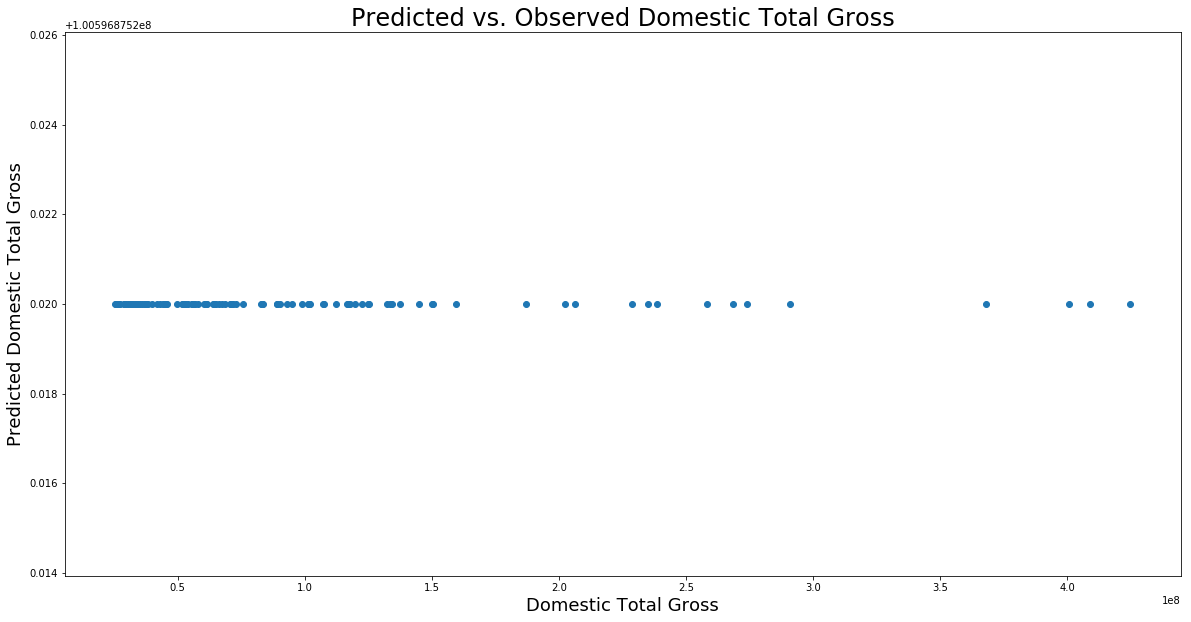

In [32]:
ypredict = lr.predict(X)
print(ypredict[0:5])

plt.figure(figsize=(20,10))
plt.scatter(y,ypredict)
plt.xlabel('Domestic Total Gross', fontsize=18)
plt.ylabel('Predicted Domestic Total Gross', fontsize=18)
plt.title('Predicted vs. Observed Domestic Total Gross', fontsize=24)

There doesn't appear to be much of a correlation between predicted and actual domestic total gross.

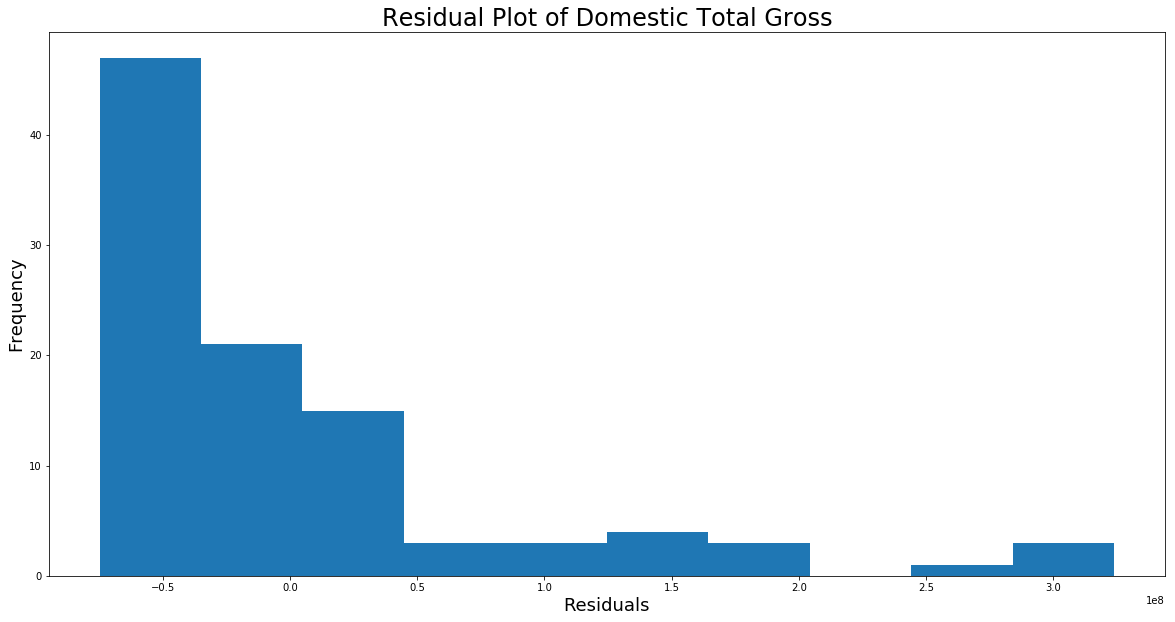

In [33]:
#histogram of residuals
plt.figure(figsize=(20,10))
plt.hist(y-ypredict)
plt.title('Residual Plot of Domestic Total Gross', fontsize=24)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Residuals', fontsize=18)

The residual plot of domestic total gross product above suggests the residuals are normally distributed with a few outliers in the right tail.

**Challenge 2**

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [34]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
constant              100 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


In [36]:
df = df.dropna()
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 8 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
constant              87 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.1+ KB


In [38]:
df.Budget.describe()

count    8.700000e+01
mean     7.545402e+07
std      5.969168e+07
min      2.500000e+06
25%      2.900000e+07
50%      5.500000e+07
75%      1.125000e+08
max      2.250000e+08
Name: Budget, dtype: float64

In [39]:
lr2=LinearRegression()
X=df[['constant','Budget']]
y=df['DomesticTotalGross']
lr2.fit(X,y)
print(lr2.score(X,y))
print(lr2.intercept_)
print(lr2.coef_)

0.28230037693
44430625.6179
[ 0.        0.783055]


The b0, or intercept, of the model is 44430625.6179. The coefficient for the constant is 0, and the coefficient for the Budget is 0.783055. Therefore, the constant has no effect on the average predicted domestic total gross. As for the Budget, when the Budget increases by 1 unit, the average predicted domestic total gross increases by ~0.783.

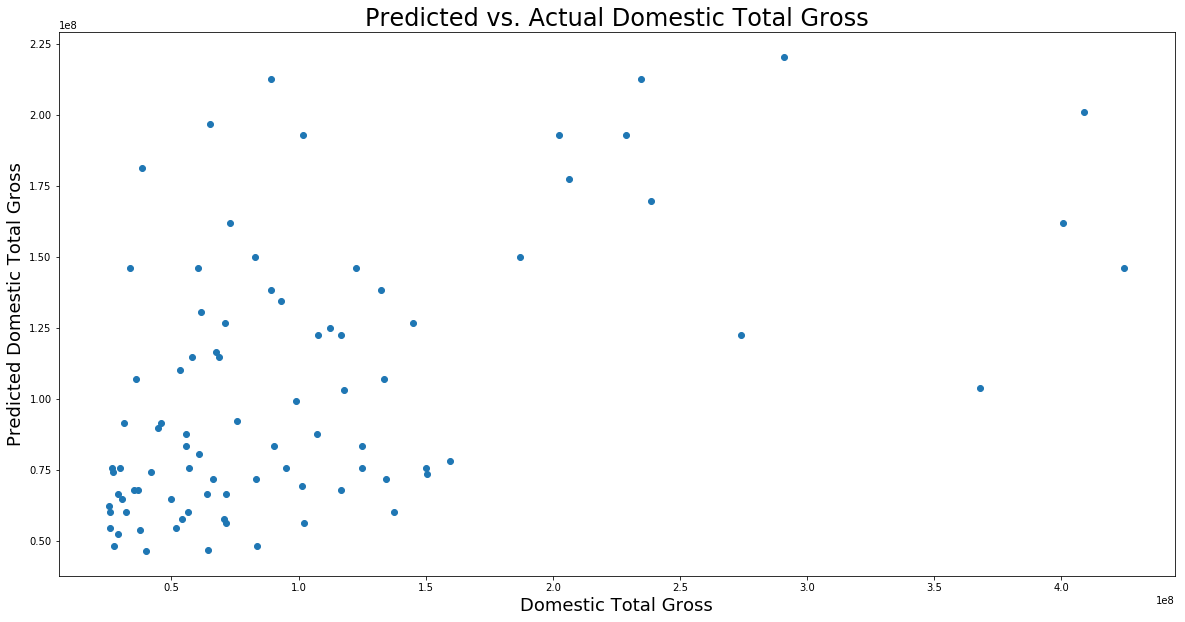

In [40]:
ypredict = lr2.predict(X)

plt.figure(figsize=(20,10))
plt.scatter(y,ypredict)
plt.xlabel('Domestic Total Gross', fontsize=18)
plt.ylabel('Predicted Domestic Total Gross', fontsize=18)
plt.title('Predicted vs. Actual Domestic Total Gross', fontsize=24)

The plot above suggests a weak correlation between predicted and actual domestic total gross.

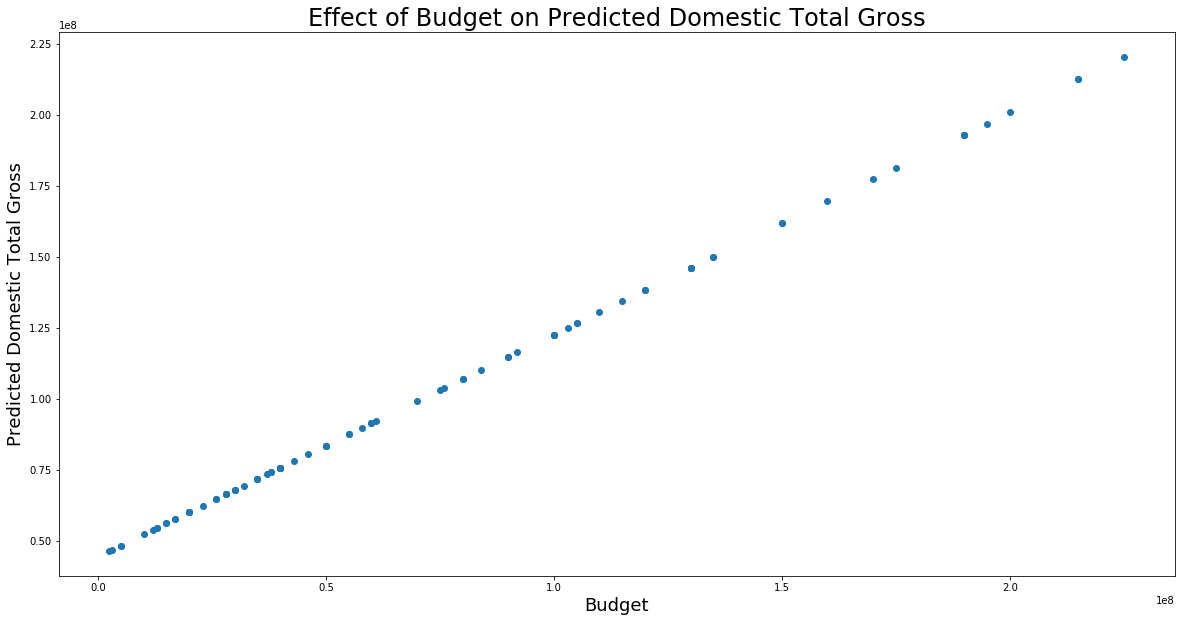

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(df['Budget'],ypredict)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Predicted Domestic Total Gross', fontsize=18)
plt.title('Effect of Budget on Predicted Domestic Total Gross', fontsize=24)

The plot above suggests Budget has a direct positive relationship to predicted Domestic Total Gross. More specifically, a 1000 unit increase in Budget results in a ~783 increase in Domestic Total Gross.

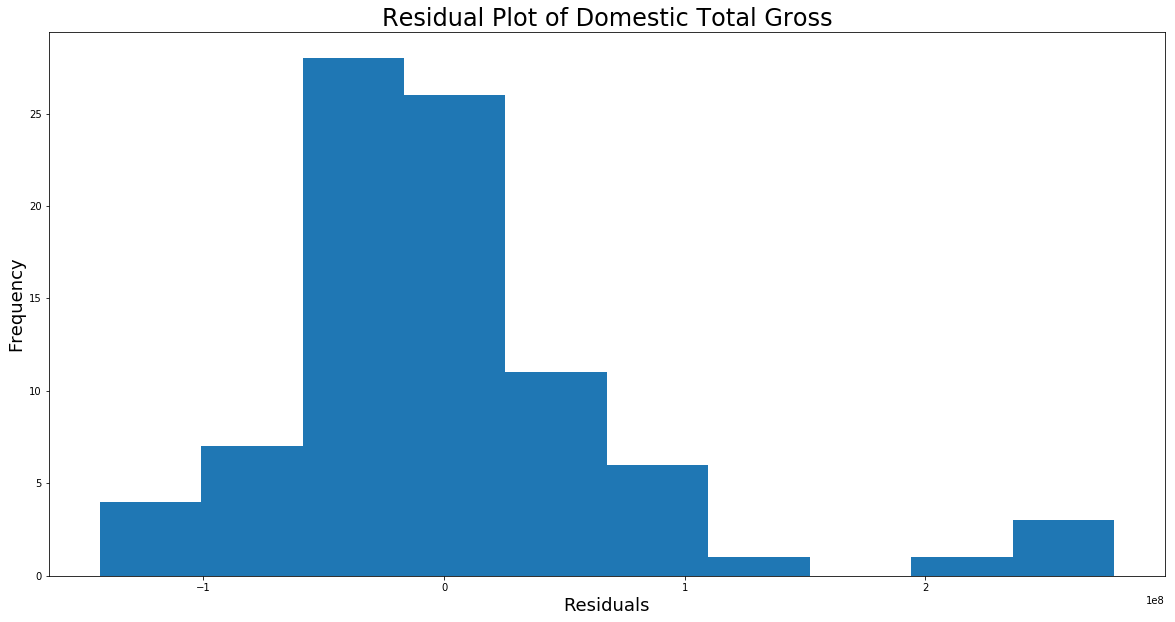

In [42]:
#histogram of residuals
plt.figure(figsize=(20,10))
plt.hist(y-ypredict)
plt.title('Residual Plot of Domestic Total Gross', fontsize=24)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Residuals', fontsize=18)

The residual plot of domestic total gross product above suggests the residuals are normally distributed with a few outliers in the right tail.

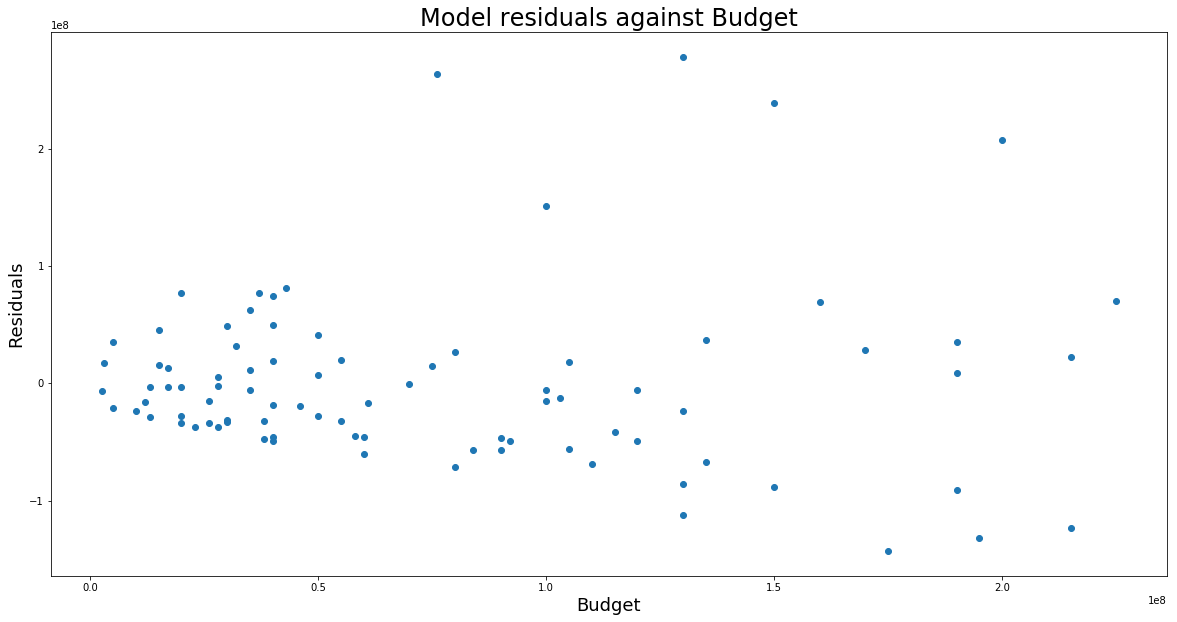

In [43]:
plt.figure(figsize=(20,10))
plt.scatter(df.Budget,y-ypredict)
plt.title('Model residuals against Budget',fontsize=24)
plt.xlabel('Budget',fontsize=18)
plt.ylabel('Residuals',fontsize=18)

The residuals appear to be homoskedastic. They are more clustered at lower values of Budget. As Budget increases, the residuals are more spread out and random.

**Challenge 3**

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [44]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 8 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
constant              87 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 8.6+ KB


In [46]:
df.Rating.value_counts()

PG-13    40
R        33
PG       14
Name: Rating, dtype: int64

In [51]:
X=patsy.dmatrix('Rating',data=df,return_type='dataframe')
X.head()

,Intercept,Rating[T.PG-13],Rating[T.R]
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,1.0,0.0


In [53]:
df2=df.join(X)
df2.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant,Intercept,Rating[T.PG-13],Rating[T.R]
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,1.0,1.0,0.0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,1.0,1.0,0.0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1.0,0.0,0.0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1.0,0.0,0.0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,1.0,1.0,0.0


In [57]:
lr3=LinearRegression()
X=df2[['constant','Budget','Rating[T.PG-13]','Rating[T.R]']]
y=df2.DomesticTotalGross
lr3.fit(X,y)
print(lr3.score(X,y))
print(lr3.intercept_)
print(lr3.coef_)

0.286901084045
57733402.9194
[  0.00000000e+00   7.80596944e-01  -1.71102537e+07  -1.38422899e+07]


The b0, or intercept, of the model is at 57733402.9194. According to the coefficients, the constant has no effect on the predictive power of the model. As for the budget, a 1000 unit increase in budget will result in a ~$780 increase in average domestic total gross. As for the PG-13 rating, a 1 unit increase in PG-13 rated movies will result in a ~17110253 decrease in average domestic total gross. As for the R rating, a 1 unit increase in R rated movies will result in a ~13842290 decrease in average domestic total gross.

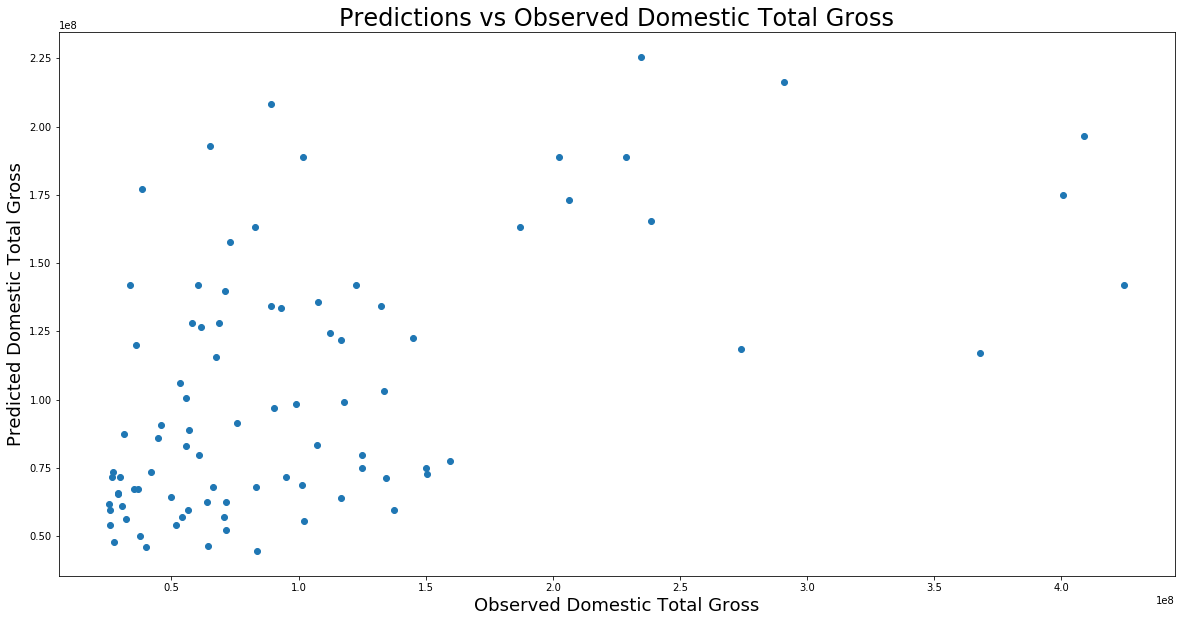

In [60]:
plt.figure(figsize=(20,10))
plt.scatter(y,lr3.predict(X))
plt.xlabel('Observed Domestic Total Gross',fontsize=18)
plt.ylabel('Predicted Domestic Total Gross',fontsize=18)
plt.title('Predictions vs Observed Domestic Total Gross',fontsize=24)

The plot above shows a weak correlation between observed and predicted domestic total gross.

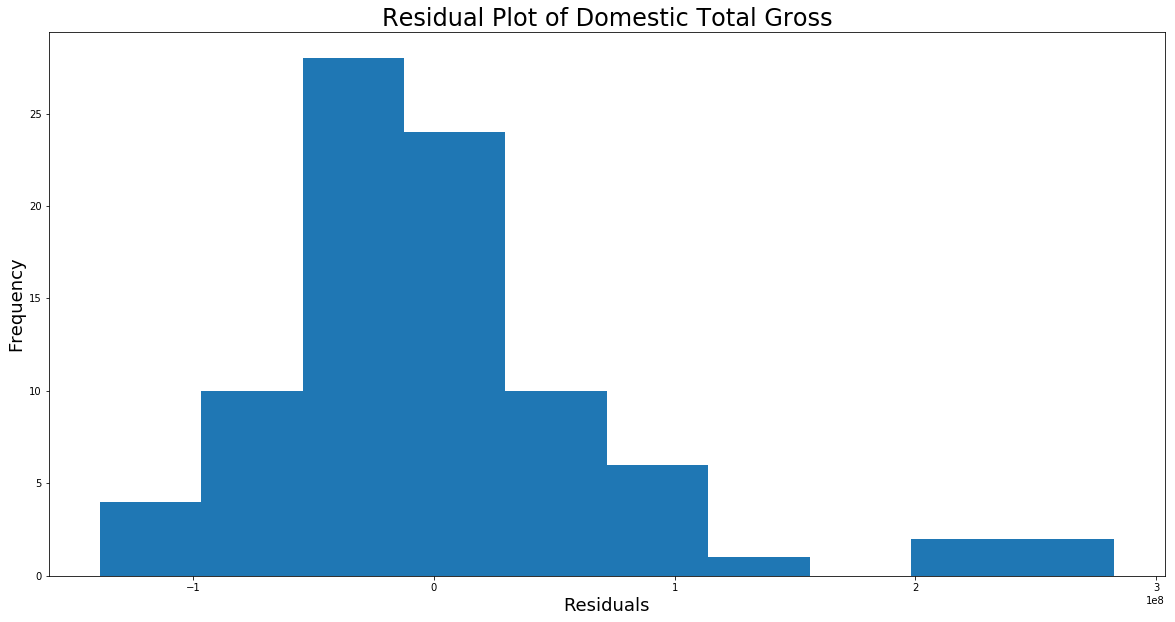

In [66]:
plt.figure(figsize=(20,10))
residuals=y-lr3.predict(X)
plt.hist(residuals)
plt.title('Residual Plot of Domestic Total Gross',fontsize=24)
plt.ylabel('Frequency',fontsize=18)
plt.xlabel('Residuals',fontsize=18)

The residual plot of domestic total gross product above suggests the residuals are normally distributed with a few outliers in the right tail.

**Challenge 4**

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

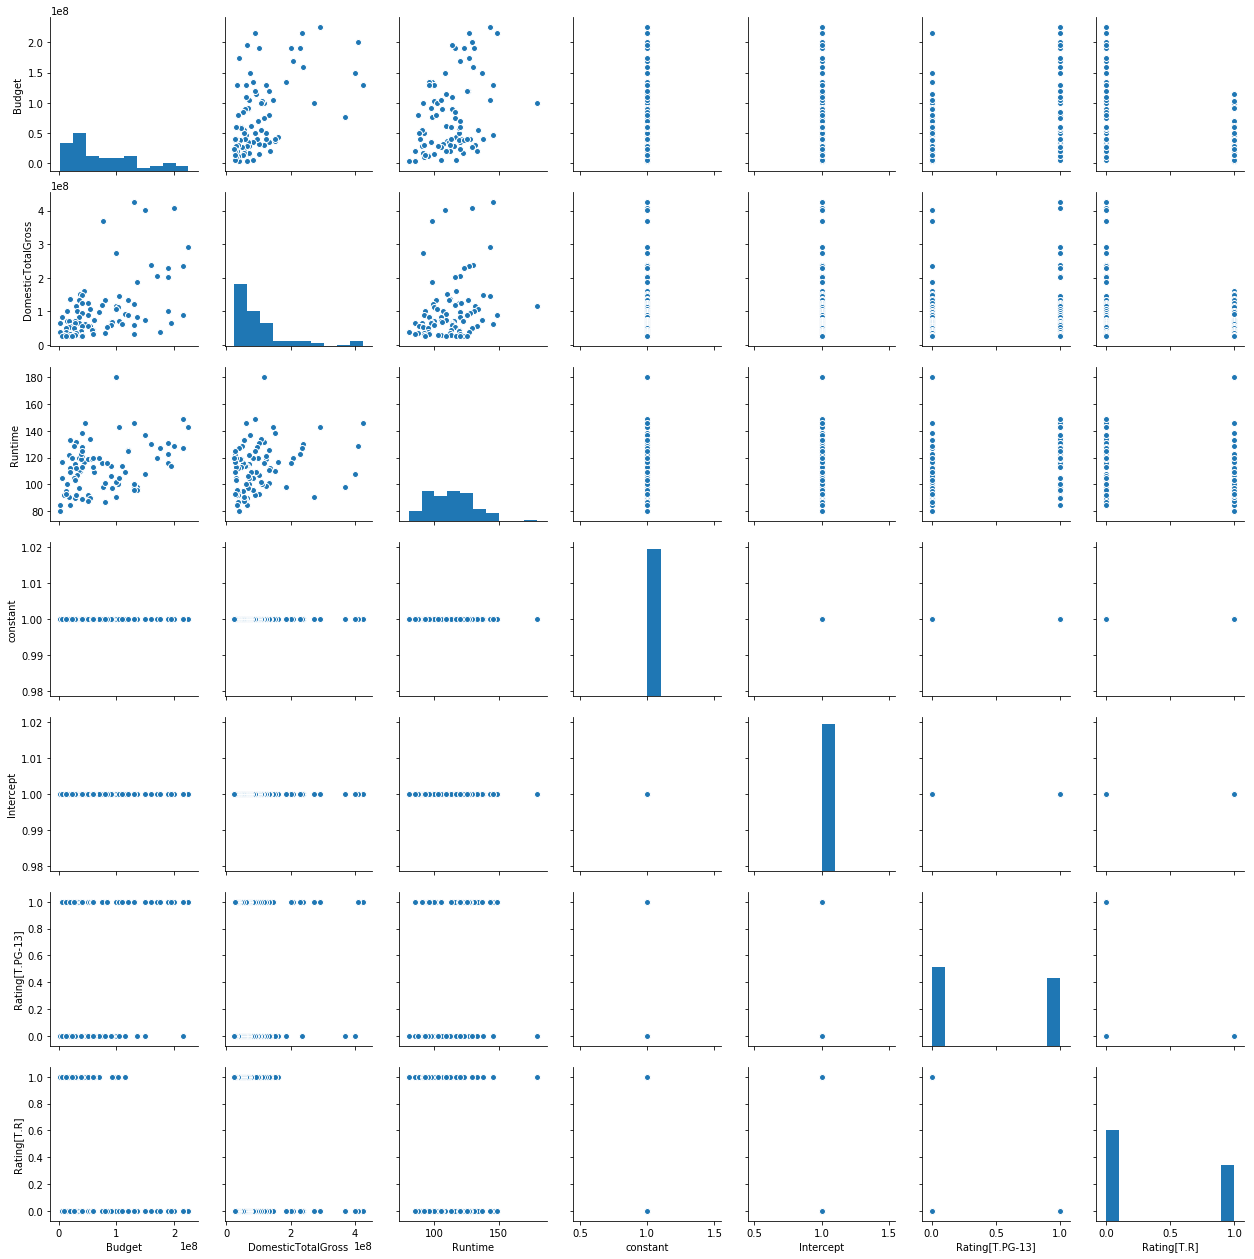

In [71]:
sns.pairplot(df2)

(array([ 37.,  21.,  14.,   3.,   3.,   3.,   2.,   0.,   1.,   3.]),
 array([  2.55682510e+07,   6.54782306e+07,   1.05388210e+08,
          1.45298190e+08,   1.85208169e+08,   2.25118149e+08,
          2.65028129e+08,   3.04938108e+08,   3.44848088e+08,
          3.84758067e+08,   4.24668047e+08]),
 <a list of 10 Patch objects>)

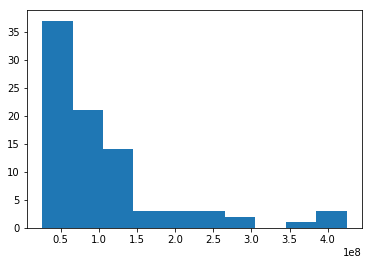

In [74]:
#transformations
plt.hist(df.DomesticTotalGross)

(array([ 13.,   8.,  10.,  15.,  12.,  13.,   4.,   6.,   2.,   4.]),
 array([ 17.05686194,  17.33785759,  17.61885323,  17.89984887,
         18.18084451,  18.46184015,  18.74283579,  19.02383143,
         19.30482707,  19.58582271,  19.86681836]),
 <a list of 10 Patch objects>)

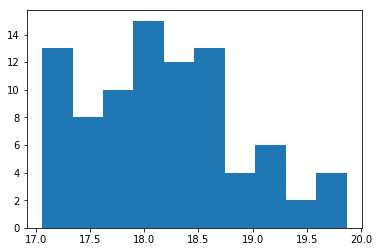

In [73]:
plt.hist(np.log(df.DomesticTotalGross))

In [103]:
lr4=LinearRegression()
X=df2[['constant','Budget','Rating[T.PG-13]','Rating[T.R]']]
df2['log_DomesticTotalGross']=np.log(df2.DomesticTotalGross)
y=df2['log_DomesticTotalGross']
lr4.fit(X,y)
print(lr4.score(X,y))
print(lr4.intercept_)
print(lr4.coef_)

0.297402987648
17.7395247775
[  0.00000000e+00   6.62982794e-09  -8.72985057e-02  -3.87247082e-02]


In [104]:
df2.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate', 'constant', 'Intercept', 'Rating[T.PG-13]',
       'Rating[T.R]', 'log_Budget', 'log_DomesticTotalGross'],
      dtype='object')

In [111]:
lsm=smf.ols('log_DomesticTotalGross ~ constant+Budget',data=df2)
fit1=lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.295
Model:                                OLS   Adj. R-squared:                  0.287
Method:                     Least Squares   F-statistic:                     35.63
Date:                    Mon, 29 Jan 2018   Prob (F-statistic):           5.34e-08
Time:                            00:41:12   Log-Likelihood:                -78.617
No. Observations:                      87   AIC:                             161.2
Df Residuals:                          85   BIC:                             166.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8466      0.052    168.831      0.000       8.742       8.951
constant       8.8466      0.052    168.831      0.000       8.742       8.951
Budget      6.517e-09   1.09e-09      5.969      0.000    4.35e-09    8.69e-09
==============================================================================
Omnibus:                        1.096   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.578   Jarque-Bera (JB):                1.103
Skew:                           0.151   Prob(JB):                        0.576
Kurtosis:                       2.539   Cond. No.                     1.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.66e-19. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R squared value and Adjusted R squared values improved after a log transformation of the predictor variable, DomesticTotalGross.

(array([ 17.,  23.,   9.,   8.,   8.,   9.,   2.,   3.,   5.,   3.]),
 array([  2.50000000e+06,   2.47500000e+07,   4.70000000e+07,
          6.92500000e+07,   9.15000000e+07,   1.13750000e+08,
          1.36000000e+08,   1.58250000e+08,   1.80500000e+08,
          2.02750000e+08,   2.25000000e+08]),
 <a list of 10 Patch objects>)

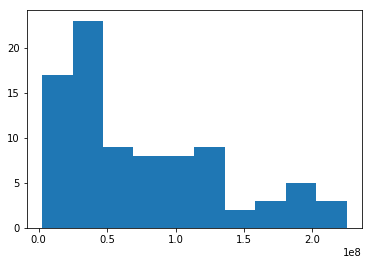

In [106]:
plt.hist(df2.Budget)

(array([  2.,   2.,   0.,   6.,   7.,  13.,  16.,  11.,  17.,  13.]),
 array([ 14.73180129,  15.18178226,  15.63176322,  16.08174419,
         16.53172516,  16.98170613,  17.43168709,  17.88166806,
         18.33164903,  18.78162999,  19.23161096]),
 <a list of 10 Patch objects>)

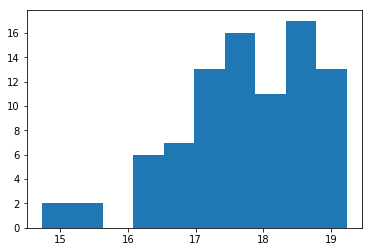

In [107]:
plt.hist(np.log(df2.Budget))

In [108]:
df2['log_Budget']=np.log(df2.Budget)
df2.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant,Intercept,Rating[T.PG-13],Rating[T.R],log_Budget,log_DomesticTotalGross
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,1.0,1.0,0.0,18.683045,19.866818
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,1.0,1.0,0.0,19.113828,19.829260
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1.0,0.0,0.0,18.826146,19.808818
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1.0,0.0,0.0,18.146244,19.723760
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,1.0,1.0,0.0,19.231611,19.488990


In [114]:
lsm2=smf.ols('log_DomesticTotalGross~constant+log_Budget',data=df2)
fit2=lsm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.259
Model:                                OLS   Adj. R-squared:                  0.251
Method:                     Least Squares   F-statistic:                     29.78
Date:                    Mon, 29 Jan 2018   Prob (F-statistic):           4.69e-07
Time:                            00:44:24   Log-Likelihood:                -80.779
No. Observations:                      87   AIC:                             165.6
Df Residuals:                          85   BIC:                             170.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8387      0.597      9.778      0.000       4.652       7.026
constant       5.8387      0.597      9.778      0.000       4.652       7.026
log_Budget     0.3666      0.067      5.458      0.000       0.233       0.500
==============================================================================
Omnibus:                        3.776   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.272
Skew:                           0.165   Prob(JB):                        0.321
Kurtosis:                       2.280   Cond. No.                     1.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Performing a transformation of the Budget feature did not improve the predictive power of the model. The R squared and Adjusted R squared values decreased.

In [113]:
lsm3=smf.ols('log_DomesticTotalGross~constant+log_Budget+Runtime',data=df2)
fit3=lsm3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     log_DomesticTotalGross   R-squared:                       0.272
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     15.69
Date:                    Mon, 29 Jan 2018   Prob (F-statistic):           1.62e-06
Time:                            00:44:10   Log-Likelihood:                -80.037
No. Observations:                      87   AIC:                             166.1
Df Residuals:                          84   BIC:                             173.5
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8649      0.596      9.841      0.000       4.680       7.050
constant       5.8649      0.596      9.841      0.000       4.680       7.050
log_Budget     0.3328      0.073      4.580      0.000       0.188       0.477
Runtime        0.0049      0.004      1.202      0.233      -0.003       0.013
==============================================================================
Omnibus:                        2.597   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.897
Skew:                           0.180   Prob(JB):                        0.387
Kurtosis:                       2.373   Cond. No.                     4.75e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.13e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Adding the runtime as a feature made the model perform worse. The R squared value lowered as did the Adjusted R squared.

**Challenge 5**

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [121]:
lr=LinearRegression()
X=df2[['constant','Budget']]
y=df2.log_DomesticTotalGross
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.predict(X_test))

0.39068020657
[ 19.10851251  18.80695898  18.29431798  18.38478404  18.77680363
  17.85404982  18.11941693  17.82992554  18.65618221  18.4752501
  17.98070231  17.99276445  18.65618221  18.23400727  17.90832946
  17.81183233  17.84198768  18.08323051  18.89742504  17.99276445
  18.11338586  18.5355608 ]


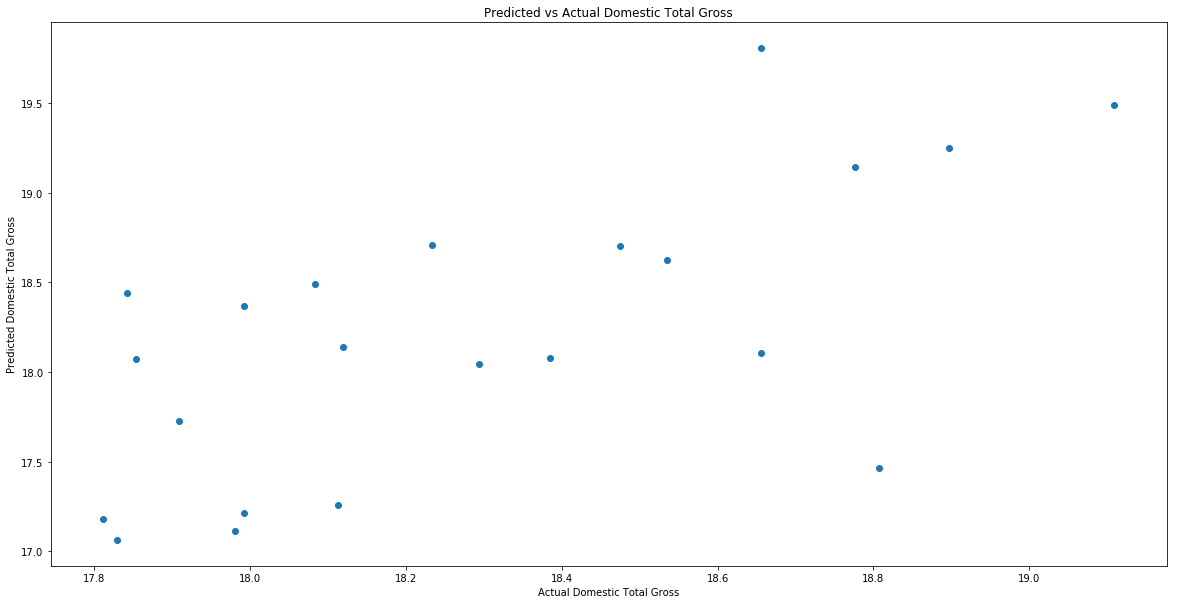

In [123]:
plt.figure(figsize=(20,10))
plt.scatter(lr.predict(X_test),y_test)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.title('Predicted vs Actual Domestic Total Gross')

There is still a weak correlation between predicted and actual domestic total gross. This suggests more feature engineering would be a wise strategy.